In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from pandas import DataFrame
import time
import gc

from IPython.display import Image
from IPython.core.display import HTML

from scipy.sparse import csr_matrix

%matplotlib inline 

import os
print(os.listdir("."))

['.gitignore', '.ipynb_checkpoints', 'data_prev', 'downloader.py', 'downloader2.py', 'feature_extractor.py', 'feature_extractor_batch.py', 'feature_extractor_linux.py', 'keras_test.py', 'main.py', 'pas.txt', 'transfer_learning_code', 'Untitled.ipynb', '__MACOSX', '__pycache__']


In [2]:
with open("./train.json") as datafile1: #first check if it's a valid json file or not
    train_data = json.load(datafile1)
with open("./test.json") as datafile2: #first check if it's a valid json file or not
    test_data = json.load(datafile2)
with open("./validation.json") as datafile3: #first check if it's a valid json file or not
    valid_data = json.load(datafile3)

In [3]:
print("####" * 10)
print("## Training Data.")
print(train_data.keys())
# print(train_data["info"])
# print(train_data["license"])
print(len(train_data["images"]))
print(len(train_data["annotations"]))
print(train_data["images"][:10])
print(train_data["annotations"][:10])

print("\n\n")
print("####" * 10)
print("## Validation Data.")
print(valid_data.keys())
print(len(valid_data["images"]))
print(len(valid_data["annotations"]))
print(valid_data["images"][:10])
print(valid_data["annotations"][:10])

print("\n\n")
print("####" * 10)
print("## Test Data.")
print(test_data.keys())
print(len(test_data["images"]))
print(test_data["images"][:10])

#print(train_data["images"])

########################################
## Training Data.
dict_keys(['images', 'annotations'])
194828
194828
[{'url': ['https://img13.360buyimg.com/imgzone/jfs/t2857/351/510705008/279959/4e27dce0/57171f60N523c940e.jpg'], 'image_id': 1}, {'url': ['http://www.tengdakeli.cn/350/timg01/uploaded/i1/12034027012625145/T1pFCtFbVcXXXXXXXX_%21%210-item_pic.jpg'], 'image_id': 2}, {'url': ['https://img13.360buyimg.com/imgzone/jfs/t8899/250/980951973/79501/43f4f687/59b25f42N52ee2b0c.jpg'], 'image_id': 3}, {'url': ['http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855447419.jpg'], 'image_id': 4}, {'url': ['http://a.vpimg4.com/upload/merchandise/287883/QQI-390870207-1.jpg'], 'image_id': 5}, {'url': ['https://img.alicdn.com/imgextra/TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-item_pic.jpg'], 'image_id': 6}, {'url': ['http://image.it168.com/n/640x480/6/6016/6016537.jpg'], 'image_id': 7}, {'url': ['http://m.360buyimg.com/n12/jfs/t2161/78/1747729168/80066/381f9f33/5672f5e9N7dfa5a0e.jpg%21q70

In [22]:
valid_data['annotations'][32]

{'image_id': 33, 'label_id': 2}

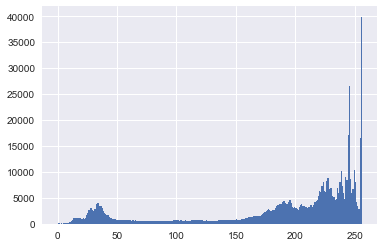

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./data/1_5.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

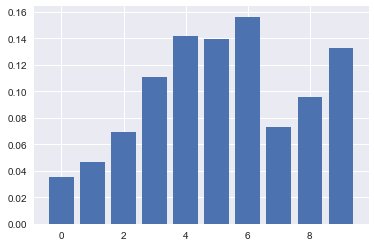

In [48]:
hist, bins = np.histogram(img, density=False)
prob1 = hist/hist.sum()
plt.bar(range(0, len(prob1)), prob1);

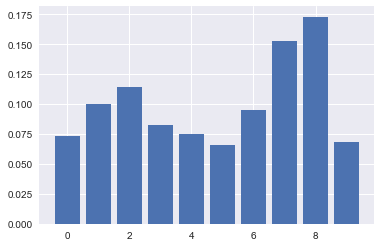

In [49]:
img = cv2.imread('./data/train/2.jpg',0)
hist, bins = np.histogram(img, density=False)
prob2 = hist/hist.sum()
plt.bar(range(0, len(prob2)), prob2);

In [ ]:
X = []
n_samples
for i in range(1, n_samples):
    img = cv2.imread('./data/train/'+str(i)+'.jpg',0)
    hist, _ = np.histogram(img, density=False)
    hist_prob = hist/hist.sum()
    X.append(hist_prob)

X.shape

In [7]:
from tqdm import tqdm
n_samples = 1000
X2 = []
with tqdm(total=n_samples) as progress_bar:
    for i in range(1, n_samples):
        img = cv2.imread('./data/train/'+str(i)+'.jpg',0)
        hist, _ = np.histogram(img, density=False)
        hist_prob = hist/hist.sum()
        X2.append(hist_prob)
        progress_bar.update(1)

100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [00:14<00:00, 74.63it/s]


In [9]:
def get_hist(i):
    img = cv2.imread('./data/train/'+str(i)+'.jpg',0)
    hist, _ = np.histogram(img, density=False)
    hist_prob = hist/hist.sum()
    return hist_prob

In [11]:
n_samples = 1000
X2 = []
with tqdm(total=n_samples) as progress_bar:
    for i in range(1, n_samples):
        X2.append(get_hist(i))
        progress_bar.update(1)

100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [00:13<00:00, 72.17it/s]


In [77]:
import pickle
X = pickle.load(open('hist_features.pkl', 'rb'))
y = [data['labelId'] for data in train_data["annotations"][:len(X)]]

FileNotFoundError: [Errno 2] No such file or directory: 'hist_features.pkl'

In [32]:
X[:3]

[array([0.035172, 0.046552, 0.069148, 0.110724, 0.14158 , 0.13948 ,
        0.156244, 0.07322 , 0.095544, 0.132336]),
 array([0.06191408, 0.14339379, 0.17189976, 0.12838186, 0.10239141,
        0.07542243, 0.0582148 , 0.06048687, 0.08834845, 0.10954654]),
 array([0.00475833, 0.00871111, 0.01144444, 0.02752778, 0.04856111,
        0.06456111, 0.07650556, 0.13604722, 0.19538889, 0.42649444])]

In [33]:
y[:3]

[['95', '66', '137', '70', '20'],
 ['36', '66', '44', '214', '105', '133'],
 ['170', '66', '97', '153', '105', '138']]

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer 
y_mlb = MultiLabelBinarizer().fit_transform(y)
# print(y)

X_train = X[:25000]
y_train = y_mlb[:25000]
X_test = X[25000:30000]
y_test = y_mlb[25000:30000]

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate='adaptive', learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

NameError: name 'y' is not defined

In [13]:
import pickle
X_train = pickle.load(open('../features/cnn_features_train_1.pkl', 'rb'))
X_val = pickle.load(open('cnn_features_validation.pkl', 'rb'))

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(list(X_train.keys())[0],0)
# cv2.imshow(img)
plt.hist(img.ravel(),256,[0,256]); plt.show()
list(X_train.keys())[0]

AttributeError: 'NoneType' object has no attribute 'ravel'

In [20]:
len(X_train.keys())

7500

In [21]:
len(X_val.keys())

1000

In [75]:
import pickle
X = pickle.load(open('cnn_features_1.pkl', 'rb'))
y = [data['labelId'] for data in train_data["annotations"][:len(X)]]

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
y_mlb = MultiLabelBinarizer().fit_transform(y)
# print(y)

X_train = X[:24000]
y_train = y_mlb[:24000]
X_test = X[24000:25000]
y_test = y_mlb[24000:25000]

mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
mlp.predict(X_test)

FileNotFoundError: [Errno 2] No such file or directory: 'cnn_features_1.pkl'

In [12]:
from sklearn.neighbors import KNeighborsClassifier

indices = np.random.randint(1, len(X_train), 5000)
print(indices)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit([X_train[index] for index in indices], [y_train[index] for index in indices])
knn.score(X_test, y_test)

[ 7130 12327  8756 ... 22117 20782 23567]


0.0

In [41]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import load_model
import numpy as np

# model = ResNet50(weights='imagenet')
# model.save('model.h5')

model = load_model('model.h5')

C:\Users\Michal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Michal\Anaconda3\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [51]:
# model.layers[-3].get_output_at(0).get_shape().as_list()

[None, 1, 1, 2048]

<Container object of 2048 artists>

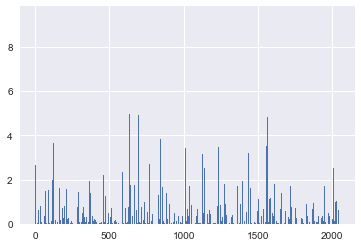

In [64]:
# from keras import backend as K
# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[-3].output])

# img_path = './data/train/1.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# layer_output = get_3rd_layer_output([x])[0]
# layer_output = layer_output.reshape(2048)
# plt.bar(range(0,layer_output.shape[0]), layer_output)

<Container object of 2048 artists>

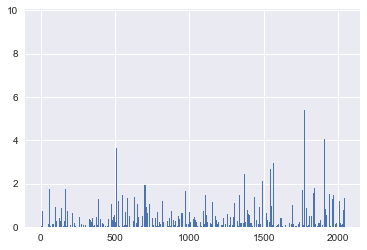

In [65]:
# img_path = './data/train/2.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# layer_output = get_3rd_layer_output([x])[0]
# layer_output = layer_output.reshape(2048)
# plt.bar(range(0,layer_output.shape[0]), layer_output)

In [68]:
test = pickle.load(open('cnn_features.pkl', 'rb'))

(2048,)

In [132]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()
start_time = time.time()
img_path = './data/train/244/1.jpg'
img = image.load_img(img_path)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x).reshape(-1)
print(features.shape)
print("--- %s seconds ---" % (time.time() - start_time))

(2048,)
--- 5.131650686264038 seconds ---


In [133]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
# model.summary()
start_time = time.time()
img_path = './data/train/244/1.jpg'
img = image.load_img(img_path)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x).reshape(-1)
print(features.shape)
print("--- %s seconds ---" % (time.time() - start_time))

(25088,)
--- 4.109935283660889 seconds ---


In [22]:
import pickle
test = pickle.load(open('cnn_features.pkl', 'rb'))
the_keys = list(test.keys())

./data\10000_77.jpg
(800, 800, 3)


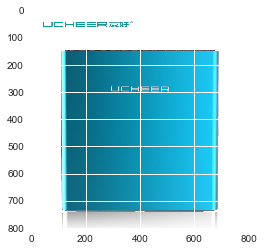

(7500,)
(7500, 2048)


In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(the_keys[0],1)
print(the_keys[0])
# plt.hist(img.ravel(),256,[0,256]); plt.show()
# plt.imshow(img)
print(img.shape)
img = img[:,:,::-1]
plt.imshow(img)
plt.show()

l = []
f = []
for item in test.keys():
    label = item.split('_',1)[1].split('.',1)[0]
    features = test[item]
    l.append(label)
    f.append(features)

l = np.array(l)
f = np.array(f)
# l.reshape(-1,1)
# f.reshape(-1,1)
# print(l, f)
print(l.shape)
print(f.shape)

In [24]:
lab = np.array([1 if item == '101' else 0 for item in l]).reshape(-1,1)
print(len(lab[lab==1]))

# from sklearn.preprocessing import MultiLabelBinarizer
# y_mlb = MultiLabelBinarizer().fit_transform(y)

1848


In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate='adaptive', learning_rate_init=.1)
mlp.fit(f, lab)

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.31749224
Iteration 2, loss = 0.06367613
Iteration 3, loss = 0.03796432
Iteration 4, loss = 0.02868714
Iteration 5, loss = 0.02300775
Iteration 6, loss = 0.01623324
Iteration 7, loss = 0.01264298
Iteration 8, loss = 0.01058578
Iteration 9, loss = 0.00899507
Iteration 10, loss = 0.00843182
Iteration 11, loss = 0.00808968
Iteration 12, loss = 0.00677216
Iteration 13, loss = 0.00628436
Iteration 14, loss = 0.00596451
Iteration 15, loss = 0.00585413
Iteration 16, loss = 0.00592872
Iteration 17, loss = 0.00547984
Iteration 18, loss = 0.00539847
Iteration 19, loss = 0.00531358
Iteration 20, loss = 0.00524765
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.020000


C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=20, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [26]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import load_model

import numpy as np

from keras import backend as K
# model = load_model('model.h5')
model = ResNet50(weights='imagenet', include_top=False)

def get_features(file):
    img = image.load_img(file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # layer_output = get_features_layer_output([x])[0]
    return [file, model.predict(x).reshape(-1)]

C:\Users\Michal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
import glob

def get_label(file):
    return file.split('_')[1].split('.')[0]

for file in glob.glob("./validation/*.jpg"):
    label = get_label(file)

    if label == '101':
#         features = get_features(file)[1].reshape(1,-1)
# #     print(features)
#         prediction = mlp.predict(features)
#         print(label, prediction)
        pass

    else:
        features = get_features(file)[1].reshape(1,-1)
    #     print(features)
        prediction = mlp.predict(features)
        print(label, prediction)
#         pass

10 [0]
14 [0]
51 [0]
6 [0]
102 [0]
55 [1]
80 [0]
64 [0]
14 [0]
109 [0]
77 [0]
3 [0]
106 [0]
123 [0]
118 [0]
44 [0]
116 [1]
53 [0]
7 [0]
49 [0]
10 [1]
64 [0]
79 [0]
28 [0]
26 [0]
67 [1]
62 [0]
78 [0]
69 [0]
88 [0]
56 [0]
85 [1]


KeyboardInterrupt: 